**TUBES Pemodelan Dan Simulasi**

**Traffic Flow**

IF-42-Gab01

Muhammad Zalfa Thoriq - 1301194473 

Fauzaan Rakantama - 130194263

In [1]:
import numpy.random as random
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from copy import copy
from operator import itemgetter

In [2]:
# inisialisasi
M = 100      #panjang lintasan
p = 0.3      #probabilitas
v0 = 0       #kecepatan awal
N = 20       #banyaknya mobil
t_max = 1000  #waktu max
v_max = 5    #kecepatan max

In [3]:
random.seed(1) #membuat array untuk jalan dan mobil
jalan = np.array( [ [[0,M+0.5], [0.5,0.5]], [[0,M+0.5], [1.5,1.5]] ] )
mobil = np.array([[random.randint(1,M), random.randint(1,2)] for i in range(1,N+1)])
mobil = np.array(sorted(mobil, key=itemgetter(0)))


In [4]:
#inisialisasi variable yang akan digunakan pada program 
jml = []
muter = 0
a = 0
v = v0
count = 0
movement = []
antrian = [i for i in range(N)]
# print(antrian)

In [5]:
# program
for t in range(t_max):
    x_row = []
    for i in antrian:
        car = mobil[i]
        next_car = mobil[i+1 if i+1 < N else 0]        
        # v1
        v = np.min([v+1, v_max])        
        # v2
        if (next_car[0] < car[0]):
            d = M - car[0] + next_car[0]
        else: 
            d = (next_car[0]-car[0])
        v = np.min([v, d-1])
        # v3
        pr = random.rand()
        if (pr < p):
            v = np.max([0, v-1])

        # update jarak dari mobil
        x = copy(car[0])
        x = x + v
        if (x >= M):
            x = x - M
        x_row.append(copy([x,car[1]]))

    mobil = copy(x_row)
    movement.append(mobil)

    #kepadatan kendraan tiap satuan waktu / density
    print ('Detik ',t)
    for j in (movement[t]):
        if j[0]>=80 and j[0]<=90:
            count+=1
    print(count/len(movement[t])*100,'%')
    count = 0
print('movement', movement)

Detik  0
10.0 %
Detik  1
10.0 %
Detik  2
10.0 %
Detik  3
10.0 %
Detik  4
15.0 %
Detik  5
10.0 %
Detik  6
10.0 %
Detik  7
10.0 %
Detik  8
15.0 %
Detik  9
10.0 %
Detik  10
10.0 %
Detik  11
15.0 %
Detik  12
10.0 %
Detik  13
10.0 %
Detik  14
10.0 %
Detik  15
10.0 %
Detik  16
10.0 %
Detik  17
10.0 %
Detik  18
10.0 %
Detik  19
10.0 %
Detik  20
10.0 %
Detik  21
10.0 %
Detik  22
10.0 %
Detik  23
10.0 %
Detik  24
10.0 %
Detik  25
5.0 %
Detik  26
10.0 %
Detik  27
5.0 %
Detik  28
10.0 %
Detik  29
10.0 %
Detik  30
5.0 %
Detik  31
10.0 %
Detik  32
10.0 %
Detik  33
5.0 %
Detik  34
10.0 %
Detik  35
5.0 %
Detik  36
10.0 %
Detik  37
5.0 %
Detik  38
10.0 %
Detik  39
10.0 %
Detik  40
10.0 %
Detik  41
15.0 %
Detik  42
10.0 %
Detik  43
15.0 %
Detik  44
10.0 %
Detik  45
10.0 %
Detik  46
15.0 %
Detik  47
10.0 %
Detik  48
15.0 %
Detik  49
15.0 %
Detik  50
20.0 %
Detik  51
15.0 %
Detik  52
20.0 %
Detik  53
20.0 %
Detik  54
20.0 %
Detik  55
20.0 %
Detik  56
25.0 %
Detik  57
20.0 %
Detik  58
25.0 %
Detik  59
25.

In [6]:
#ratarata waktu mobil kembali ke posisi awal
for i in range(len(movement) - 1):
    if a>=len(movement) - 1:
        break
    a = i + 1
    nextemp = movement[a][2]
    temp = movement[i][2]
    if nextemp[0]<temp[0]:
        if nextemp[0] == movement[a][2][0] or nextemp[0] >= movement[a][2][0]:  
            jml.append(a)
            muter+=1

avg = jml[-1]/muter
print('Perputaran =',muter)
print('Rata-rata waktu =',avg)

Perputaran = 22
Rata-rata waktu = 45.04545454545455


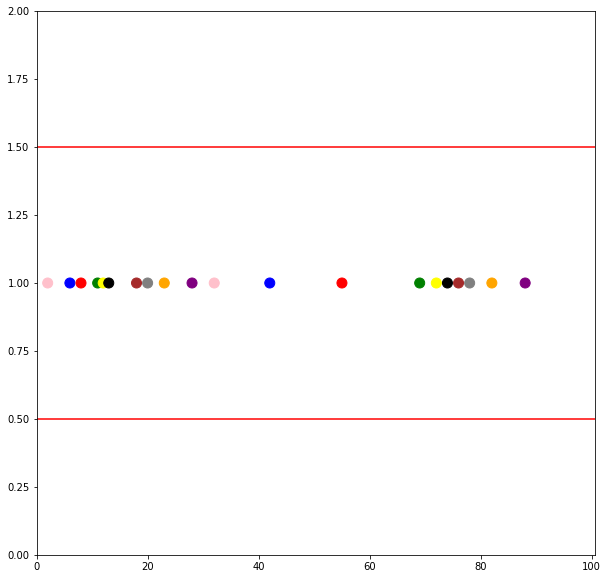

In [7]:
# animasi simulasi sistem berjalan traffic low
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = plt.axes(ylim=(0,2), xlim=(0,M+0.5))
for road in jalan:
    plt.plot(road[0], road[1], c="red")
    x = np.arange(10)
mobil_1 = [x[0] for x in movement[0]]
mobil_2 = [x[1] for x in movement[1]]
color = ['pink', 'blue', 'red', 'green', 'yellow', 'black', 'brown', 'grey', 'orange', 'purple', 'pink', 'blue', 'red', 'green', 'yellow', 'black', 'brown', 'grey', 'orange', 'purple']
car_marker = ax.scatter(mobil_1, mobil_2, c=color, s=100, marker="o")

In [8]:
def animate(i):
    mobil_position = movement[i]
    car_marker.set_offsets(mobil_position)
    return car_marker

anim = animation.FuncAnimation(fig, animate, frames=len(movement), interval=100)
plt.show()